In [47]:
# Importa as bibliotecas tecnológicas a serem utilizadas
%run '~/git/Bibliotecas.ipynb'

In [48]:
print('\n\n\n\nChuvas na Região de Pouso Alegre\n\n')





Chuvas na Região de Pouso Alegre




In [49]:
print('\nIdentifica estrutura lógica do nome dos arquivos do INMET:\n')


Identifica estrutura lógica do nome dos arquivos do INMET:



In [50]:
import os
import zipfile

pasta = '/home/andre301267/BD/Inmet/'
arquivos_na_pasta = os.listdir(pasta)

# Filtrar apenas os arquivos zip na pasta
arquivos_zip = [arquivo for arquivo in arquivos_na_pasta if arquivo.endswith('.zip')]

if arquivos_zip:
    primeiro_zip = arquivos_zip[0]
    
    caminho_zip = os.path.join(pasta, primeiro_zip)
    
    with zipfile.ZipFile(caminho_zip, 'r') as zip_ref:
        # Obter os nomes de todos os arquivos dentro do primeiro arquivo zipado
        nomes_arquivos = zip_ref.namelist()
        
        # Imprimir os nomes dos três primeiros arquivos
        for i in range(min(3, len(nomes_arquivos))):
            print(nomes_arquivos[i])
else:
    print("Não foram encontrados arquivos zip na pasta.")


2000/
2000/INMET_CO_DF_A001_BRASILIA_07-05-2000_A_31-12-2000.CSV
2000/INMET_NE_BA_A401_SALVADOR_13-05-2000_A_31-12-2000.CSV


Nota-se que a sigla da UF e o nome do município encontram-se presentes no nome dos arquivos dentro do arquivo zipado

In [51]:
m_r_pa=pd.read_csv('~/git/Importacao-por-SH-e-Municipio/temp/m_r_pa.csv')
m_r_pa=m_r_pa.Município.str.strip().str.upper()
m_r_pa

0           AIURUOCA
1             ALAGOA
2          ALBERTINA
3           ANDRADAS
4           BAEPENDI
           ...      
75     TOCOS DO MOJI
76            TOLEDO
77       TURVOLÂNDIA
78          VIRGÍNIA
79    WENCESLAU BRAZ
Name: Município, Length: 80, dtype: object

In [52]:
print('\n\nIdentifica a estrutura interna dos arquivos\n')



Identifica a estrutura interna dos arquivos



In [97]:
import os
import pandas as pd
from zipfile import ZipFile
from pathlib import Path

n_s=pd.DataFrame()

# Diretório dos arquivos ZIP
pasta_zip = Path('/home/andre301267/BD/Inmet/').expanduser()

# Lista de strings para verificar no nome do subarquivo
#m_r_pa = ["string1", "string2", "outrastring"]

# Inicializa o DataFrame
chuvas_r_pa = pd.DataFrame()

# Itera sobre todos os arquivos ZIP na pasta
for arquivo_zip in pasta_zip.glob('*.zip'):
    with ZipFile(arquivo_zip, 'r') as zip_ref:
        
        # Itera sobre os subarquivos no arquivo ZIP
        for nome_subarquivo in zip_ref.namelist():
            #print(nome_subarquivo)
            # Verifica se o subarquivo atende aos critérios
            if "_MG_" in nome_subarquivo and any(string in nome_subarquivo for string in m_r_pa):
                df=pd.DataFrame({'nome_subarquivo':[nome_subarquivo]})
                n_s=pd.concat([n_s,df])
                # Extrai as 3 primeiras colunas e as linhas a partir da 10ª
                with zip_ref.open(nome_subarquivo) as subarquivo:
                    #print(subarquivo)
                    df = pd.read_csv(subarquivo,  skiprows=8, usecols=[0,1,2], delimiter=';',encoding='Latin-1')
                    # concatena verticalmente com o DataFrame principal
                    chuvas_r_pa = pd.concat([chuvas_r_pa, df], ignore_index=True,axis=0)

# Exibe o resultado
display(chuvas_r_pa)

,DATA (YYYY-MM-DD),HORA (UTC),"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)",Data,Hora UTC
0,2007-01-01,00:00,",8",NaN,NaN
1,2007-01-01,01:00,",2",NaN,NaN
2,2007-01-01,02:00,",2",NaN,NaN
3,2007-01-01,03:00,-9999,NaN,NaN
4,2007-01-01,04:00,-9999,NaN,NaN
...,...,...,...,...,...
448291,NaN,NaN,"4,8",2021/12/31,1900 UTC
448292,NaN,NaN,",4",2021/12/31,2000 UTC
448293,NaN,NaN,"1,8",2021/12/31,2100 UTC
448294,NaN,NaN,",4",2021/12/31,2200 UTC


In [111]:
print('\n\nOs municípios da região de Pouso Alegre que possuem estação \n\
meteorológica automática do INMET insataladas em seu território são:\n')
for m in n_s.nome_subarquivo.str.split('_',expand=True)[[4]].drop_duplicates()[4].tolist():
    print(m)
    



Os municípios da região de Pouso Alegre que possuem estação 
meteorológica automática do INMET insataladas em seu território são:

CONCEICAO DAS ALAGOAS
PASSA QUATRO
CALDAS


In [54]:
chuvas_r_pa.columns=['date','hora','mm','date1','hora1']
chuvas_r_pa

,date,hora,mm,date1,hora1
0,2007-01-01,00:00,",8",NaN,NaN
1,2007-01-01,01:00,",2",NaN,NaN
2,2007-01-01,02:00,",2",NaN,NaN
3,2007-01-01,03:00,-9999,NaN,NaN
4,2007-01-01,04:00,-9999,NaN,NaN
...,...,...,...,...,...
448291,NaN,NaN,"4,8",2021/12/31,1900 UTC
448292,NaN,NaN,",4",2021/12/31,2000 UTC
448293,NaN,NaN,"1,8",2021/12/31,2100 UTC
448294,NaN,NaN,",4",2021/12/31,2200 UTC


In [55]:
chuvas_r_pa_1=chuvas_r_pa[['date','hora','mm']].dropna()
chuvas_r_pa_2=chuvas_r_pa[['date1','hora1','mm']].rename(columns={'date1':'date','hora1':'hora'}).dropna()

In [56]:
chuvas_r_pa_1['datetime']=pd.to_datetime(chuvas_r_pa_1.date+'-'+chuvas_r_pa_1.hora)

In [57]:
chuvas_r_pa_1

,date,hora,mm,datetime
0,2007-01-01,00:00,",8",2007-01-01 00:00:00
1,2007-01-01,01:00,",2",2007-01-01 01:00:00
2,2007-01-01,02:00,",2",2007-01-01 02:00:00
3,2007-01-01,03:00,-9999,2007-01-01 03:00:00
4,2007-01-01,04:00,-9999,2007-01-01 04:00:00
...,...,...,...,...
316819,2018-12-31,19:00,0,2018-12-31 19:00:00
316820,2018-12-31,20:00,0,2018-12-31 20:00:00
316821,2018-12-31,21:00,0,2018-12-31 21:00:00
316822,2018-12-31,22:00,0,2018-12-31 22:00:00


In [58]:
chuvas_r_pa_2.hora=chuvas_r_pa_2.hora.str.split(expand=True)[0]
chuvas_r_pa_2['datetime']=pd.to_datetime(chuvas_r_pa_2.date+'-'+chuvas_r_pa_2.hora)
chuvas_r_pa_2

,date,hora,mm,datetime
316824,2019/01/01,0000,0,2019-01-01 00:00:00
316825,2019/01/01,0100,0,2019-01-01 01:00:00
316826,2019/01/01,0200,0,2019-01-01 02:00:00
316827,2019/01/01,0300,0,2019-01-01 03:00:00
316828,2019/01/01,0400,0,2019-01-01 04:00:00
...,...,...,...,...
448291,2021/12/31,1900,"4,8",2021-12-31 19:00:00
448292,2021/12/31,2000,",4",2021-12-31 20:00:00
448293,2021/12/31,2100,"1,8",2021-12-31 21:00:00
448294,2021/12/31,2200,",4",2021-12-31 22:00:00


In [59]:
chuvas_r_pa_1.sort_values(by=['datetime']).tail()

,date,hora,mm,datetime
308062,2018-12-31,22:00,0,2018-12-31 22:00:00
316822,2018-12-31,22:00,0,2018-12-31 22:00:00
299303,2018-12-31,23:00,0,2018-12-31 23:00:00
308063,2018-12-31,23:00,0,2018-12-31 23:00:00
316823,2018-12-31,23:00,0,2018-12-31 23:00:00


In [60]:
chuvas_r_pa_2.sort_values(by=['datetime']).head()

,date,hora,mm,datetime
316824,2019/01/01,0000,0,2019-01-01 00:00:00
334344,2019/01/01,0000,0,2019-01-01 00:00:00
325584,2019/01/01,0000,0,2019-01-01 00:00:00
325585,2019/01/01,0100,0,2019-01-01 01:00:00
334345,2019/01/01,0100,0,2019-01-01 01:00:00


# Como esta havendo continuidade perfeita entre as partes com e sem marcação "UTC", será considerado todos registros marcados com o mesmo horário UTC.

In [61]:
chuvas_r_pa=pd.concat([chuvas_r_pa_1,chuvas_r_pa_2])
chuvas_r_pa=chuvas_r_pa.sort_values(by=['datetime'])
chuvas_r_pa

,date,hora,mm,datetime
101616,2006-07-18,00:00,-9999,2006-07-18 00:00:00
101617,2006-07-18,01:00,-9999,2006-07-18 01:00:00
101618,2006-07-18,02:00,-9999,2006-07-18 02:00:00
101619,2006-07-18,03:00,-9999,2006-07-18 03:00:00
101620,2006-07-18,04:00,-9999,2006-07-18 04:00:00
...,...,...,...,...
378214,2023/12/31,2200,0,2023-12-31 22:00:00
386974,2023/12/31,2200,0,2023-12-31 22:00:00
378215,2023/12/31,2300,0,2023-12-31 23:00:00
395735,2023/12/31,2300,"13,4",2023-12-31 23:00:00


In [62]:
chuvas_r_pa.mm.unique()

array(['-9999', '0', ',4', ',2', '1,4', '1,2', '4,4', '3,6', '2', '3',
       '8,4', '2,8', '7,6', '2,4', ',8', '10', ',6', '13', '7', '1,6',
       '1,8', '9,4', '8,8', '6,2', '4', '3,8', '1', '2,2', '2,6', '3,2',
       '6,6', '9', '5', '4,6', '14,6', '9,2', '22', '12,6', '15,8', '4,8',
       '10,4', '11,4', '14,2', '12,2', '10,2', '5,2', '8,6', '7,4',
       '28,6', '32,2', '11,8', '24,6', '4,2', '26,6', '40,2', '5,6',
       '10,6', '9,6', '8', '6,8', '12', '12,8', '46', '7,2', '6', '15',
       '14,4', '12,4', '14', '5,8', '23', '27,8', '6,4', '9,8', '7,8',
       '18,2', '16,8', '19,6', '17,2', '3,4', '15,2', '5,4', '20', '10,8',
       '8,2', '11,2', '17,4', '11', '15,6', '24', '13,4', '21,2', '19,2',
       '17', '13,6', '16', '11,6', '21,6', '20,8', '18', '23,8', '20,2',
       '14,8', '30,4', '27,6', '16,2', '27,4', '19', '36,6', '26', '25,6',
       '13,2', '22,6', '24,8', '25,4', '33', '21', '16,6', '17,6', '24,4',
       '23,2', '20,6', '15,4', '19,4', '32,4', '38,2', '21

In [63]:
chuvas_r_pa.mm=chuvas_r_pa.mm.replace('-9999',np.nan)
chuvas_r_pa.mm=chuvas_r_pa.mm.str.replace(',','.')
chuvas_r_pa.mm=chuvas_r_pa.mm.astype(float)
chuvas_r_pa

,date,hora,mm,datetime
101616,2006-07-18,00:00,NaN,2006-07-18 00:00:00
101617,2006-07-18,01:00,NaN,2006-07-18 01:00:00
101618,2006-07-18,02:00,NaN,2006-07-18 02:00:00
101619,2006-07-18,03:00,NaN,2006-07-18 03:00:00
101620,2006-07-18,04:00,NaN,2006-07-18 04:00:00
...,...,...,...,...
378214,2023/12/31,2200,0.0,2023-12-31 22:00:00
386974,2023/12/31,2200,0.0,2023-12-31 22:00:00
378215,2023/12/31,2300,0.0,2023-12-31 23:00:00
395735,2023/12/31,2300,13.4,2023-12-31 23:00:00


In [64]:
chuvas_r_pa=chuvas_r_pa[['datetime','mm']].sort_values('datetime')
chuvas_r_pa.head(20)

,datetime,mm
101616,2006-07-18 00:00:00,NaN
101617,2006-07-18 01:00:00,NaN
101618,2006-07-18 02:00:00,NaN
101619,2006-07-18 03:00:00,NaN
101620,2006-07-18 04:00:00,NaN
101621,2006-07-18 05:00:00,NaN
101622,2006-07-18 06:00:00,NaN
101623,2006-07-18 07:00:00,NaN
101624,2006-07-18 08:00:00,NaN
101625,2006-07-18 09:00:00,NaN


In [65]:
chuvas_r_pa[['datetime']].duplicated().sum()

293113

In [66]:
len(chuvas_r_pa)

446137

In [67]:
chuvas_r_pa=chuvas_r_pa[chuvas_r_pa.datetime.dt.year>2006]

In [68]:
len(chuvas_r_pa)

441313

In [69]:
chuvas_r_pa['m']=chuvas_r_pa.datetime.dt.month
chuvas_r_pa

,datetime,mm,m
13944,2007-01-01 00:00:00,4.0,1
0,2007-01-01 00:00:00,0.8,1
13945,2007-01-01 01:00:00,2.0,1
1,2007-01-01 01:00:00,0.2,1
2,2007-01-01 02:00:00,0.2,1
...,...,...,...
395734,2023-12-31 22:00:00,2.2,12
386974,2023-12-31 22:00:00,0.0,12
395735,2023-12-31 23:00:00,13.4,12
378215,2023-12-31 23:00:00,0.0,12


In [70]:
c_na=chuvas_r_pa[chuvas_r_pa.mm.isna()]
c_sna=chuvas_r_pa[~chuvas_r_pa.mm.isna()]

In [71]:
c_m=chuvas_r_pa.groupby('m').mm.mean().reset_index()

In [72]:
c_na_transf=c_na.drop(columns='mm').merge(c_m)

In [73]:
chuvas_r_pa=pd.concat([c_na_transf,c_sna])

In [74]:
chuvas_r_pa.describe()

,datetime,m,mm
count,441313,441313.000000,441313.000000
mean,2015-07-14 02:08:34.124895232,6.565744,0.151289
min,2007-01-01 00:00:00,1.000000,0.000000
25%,2011-05-02 00:00:00,4.000000,0.000000
50%,2015-07-12 08:00:00,7.000000,0.000000
75%,2019-09-23 16:00:00,10.000000,0.000000
max,2023-12-31 23:00:00,12.000000,58.200000
std,NaN,3.440549,1.076387


Text(0.5, 1.05, 'Chuvas na Região de Pouso Alegre')

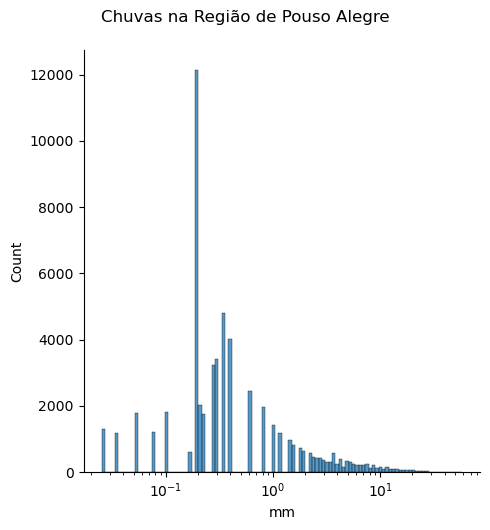

In [75]:
sns.displot(data=chuvas_r_pa[chuvas_r_pa.mm>0],x='mm', log_scale=True)\
.fig.suptitle('Chuvas na Região de Pouso Alegre',y=1.05)

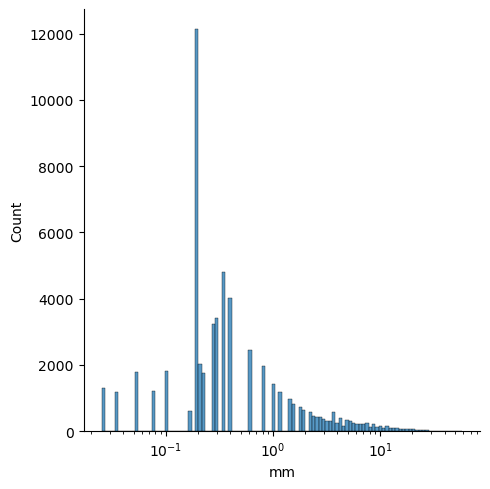

In [76]:
sns.displot(data=chuvas_r_pa[chuvas_r_pa.mm>0],x='mm', log_scale=True)

In [77]:
chuvas_r_pa=chuvas_r_pa.groupby('datetime').mm.mean().reset_index()
print('\n\nAgrupa Estações Meteorológicas\n')



Agrupa Estações Meteorológicas



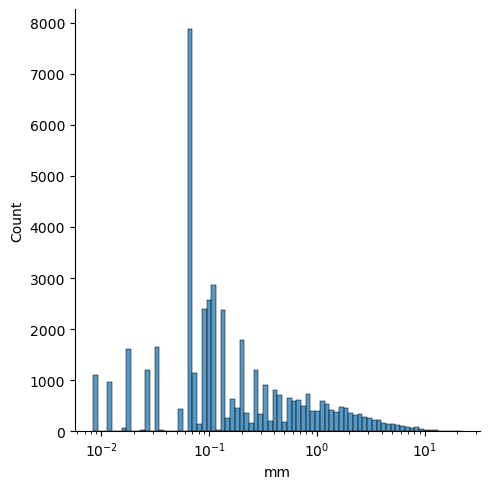

In [78]:
sns.displot(data=chuvas_r_pa[chuvas_r_pa.mm>0],x='mm',log_scale=True)

In [79]:
chuvas_r_pa['Ano']=chuvas_r_pa.datetime.dt.year
chuvas_r_pa['Mês']=chuvas_r_pa.datetime.dt.month
chuvas_r_pa['date']=pd.to_datetime(chuvas_r_pa.Ano.astype(str)+'/'+chuvas_r_pa.Mês.astype(str)+'/1')
chuvas_r_pa=chuvas_r_pa.groupby(by=['date','Ano','Mês']).mm.sum().reset_index()
print('\n\nAgrupa por mês\n')



Agrupa por mês



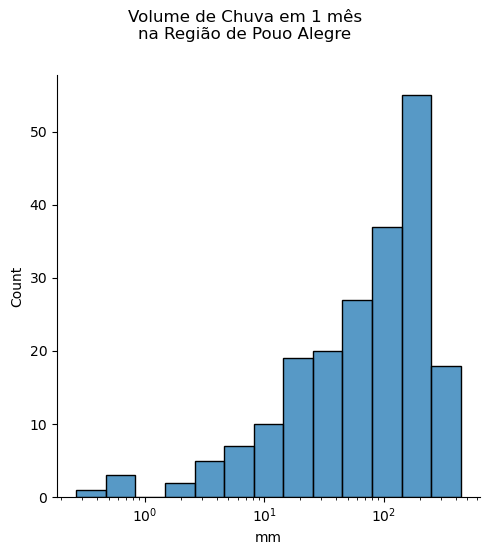

In [80]:
sns.displot(data=chuvas_r_pa[chuvas_r_pa.mm>0],x='mm',log_scale=True)\
.fig.suptitle('Volume de Chuva em 1 mês\n\
na Região de Pouo Alegre',y=1.1)
plt.show()

In [82]:
chuvas_r_pa=chuvas_r_pa[chuvas_r_pa.mm>1]

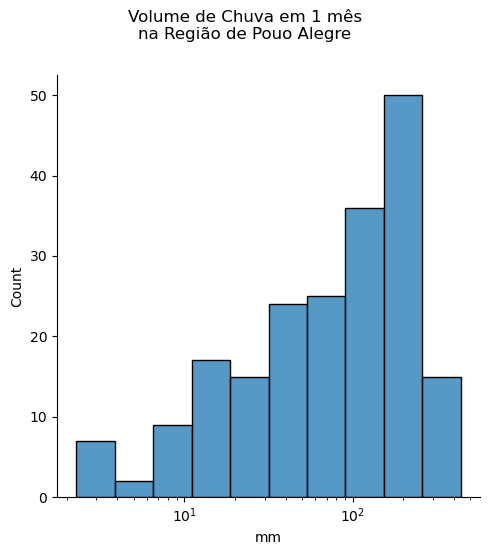

In [83]:
sns.displot(data=chuvas_r_pa[chuvas_r_pa.mm>0],x='mm',log_scale=True)\
.fig.suptitle('Volume de Chuva em 1 mês\n\
na Região de Pouo Alegre',y=1.1)
plt.show()

In [81]:
chuvas_r_pa.to_csv('~/git/Importacao-por-SH-e-Municipio/temp/chuvas_r_pa.csv',index=False)